In [1]:
import numpy as np

In [15]:
def sample_points(k):
    x = np.random.rand(k,50)
    y = np.random.choice([0, 1], size=k, p=[.5, .5]).reshape([-1,1])
    return x,y

In [16]:
x_data, y_data = sample_points(50)

In [17]:
x_data

array([[0.11438184, 0.98557216, 0.56483023, ..., 0.38431593, 0.31400282,
        0.49572964],
       [0.43706664, 0.44000485, 0.41270182, ..., 0.1439605 , 0.85044932,
        0.27019091],
       [0.85813237, 0.44019033, 0.3329384 , ..., 0.78289343, 0.49695777,
        0.81334049],
       ...,
       [0.96425703, 0.78422118, 0.85400943, ..., 0.9899439 , 0.91050346,
        0.67881527],
       [0.82121552, 0.16893571, 0.13613373, ..., 0.14856554, 0.39907323,
        0.37078076],
       [0.61066547, 0.66778524, 0.05827219, ..., 0.21389291, 0.06055914,
        0.81013767]])

In [25]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

        
                

In [28]:

num_tasks = 10
num_samples = 10
epochs = 10000   
alpha = 0.0001
beta = 0.0001
theta = np.random.normal(size=50).reshape(50, 1)
      
      
for e in range(epochs):
    theta_ = []
    for i in range(num_tasks):
        #sample k data points and prepare our train set
        XTrain, YTrain = sample_points(num_samples)
        a = np.matmul(XTrain, theta)

        YHat = sigmoid(a)

        #since we are performing classification, we use cross entropy loss as our loss function
        loss = ((np.matmul(-YTrain.T, np.log(YHat)) - np.matmul((1 -YTrain.T), np.log(1 - YHat)))/num_samples)[0][0]
                
        #minimize the loss by calculating gradients
        gradient = np.matmul(XTrain.T, (YHat - YTrain)) / num_samples

        #update the gradients and find the optimal parameter theta' for each of tasks
        theta_.append(theta - alpha*gradient)           
     
    #initialize meta gradients
    meta_gradient = np.zeros(theta.shape)
                        
    for i in range(num_tasks):
            
        #sample k data points and prepare our test set for meta training
        XTest, YTest = sample_points(10)

        #predict the value of y
        a = np.matmul(XTest, theta_[i])
                
        YPred = sigmoid(a)
                           
        #compute meta gradients
        meta_gradient += np.matmul(XTest.T, (YPred - YTest)) /num_samples

  
    #update our randomly initialized model parameter theta with the meta gradients
    theta = theta-beta*meta_gradient/num_tasks
                                       
    if e%1000==0:
        print(f"Epoch {e}: Loss {loss})") 
        print(f"Updated Model Parameter Theta\n")
        print(f"Sampling Next Batch of Tasks \n")

Epoch 0: Loss 1.1568824321797497)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 1000: Loss 1.3769557582004481)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 2000: Loss 1.1230400080565244)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 3000: Loss 0.9261608322824466)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 4000: Loss 1.5205998688151627)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 5000: Loss 1.114411656509178)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 6000: Loss 0.9690273149781066)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 7000: Loss 1.4081983309312947)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 8000: Loss 1.0736987716616926)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 9000: Loss 1.1326591034027182)
Updated Model Parameter Theta

Sampling Next Batch of Tasks 



In [31]:
num_tasks = 10
num_samples = 10
epochs = 1000  # Change epochs to 1000
alpha = 0.0001
beta = 0.0001
theta = np.random.normal(size=50).reshape(50, 1)

# Initialize lists to store train and test losses for all epochs
all_train_losses = []
all_test_losses = []

for e in range(epochs):
    theta_ = []
    train_losses = []  # To store train losses for each task
    test_losses = []   # To store test losses for meta optimization
    
    for i in range(num_tasks):
        # Sample k data points and prepare our train set
        XTrain, YTrain = sample_points(num_samples)
        a = np.matmul(XTrain, theta)

        YHat = sigmoid(a)

        # Calculate cross-entropy loss for train set
        loss = ((np.matmul(-YTrain.T, np.log(YHat)) - np.matmul((1 - YTrain.T), np.log(1 - YHat))) / num_samples)[0][0]
        train_losses.append(loss)  # Store train loss
        
        # Minimize the loss by calculating gradients
        gradient = np.matmul(XTrain.T, (YHat - YTrain)) / num_samples

        # Update the gradients and find the optimal parameter theta' for each task
        theta_.append(theta - alpha * gradient)           
    
    # Initialize meta gradients
    meta_gradient = np.zeros(theta.shape)
    
    for i in range(num_tasks):
        # Sample k data points and prepare our test set for meta training
        XTest, YTest = sample_points(10)

        # Predict the value of y
        a = np.matmul(XTest, theta_[i])
        YPred = sigmoid(a)
                           
        # Compute test losses for meta optimization
        test_loss = ((np.matmul(-YTest.T, np.log(YPred)) - np.matmul((1 - YTest.T), np.log(1 - YPred))) / 10)[0][0]
        test_losses.append(test_loss)  # Store test loss

        # Compute meta gradients
        meta_gradient += np.matmul(XTest.T, (YPred - YTest)) / num_samples
  
    # Update the randomly initialized model parameter theta with the meta gradients
    theta = theta - beta * meta_gradient / num_tasks
                                       
    # Calculate average train and test loss for this epoch
    avg_train_loss = np.mean(train_losses)
    avg_test_loss = np.mean(test_losses)
    
    # Append the losses to the lists
    all_train_losses.append(avg_train_loss)
    all_test_losses.append(avg_test_loss)
    
    if e % 100 == 0:  # Print every 100 epochs
        print(f"Epoch {e}: Train Loss {avg_train_loss}, Test Loss {avg_test_loss}")
        print(f"Updated Model Parameter Theta\n")
        print(f"Sampling Next Batch of Tasks \n")

# Print the lists containing train and test losses for all epochs
print("All Train Losses:", all_train_losses)
print("All Test Losses:", all_test_losses)


Epoch 0: Train Loss 1.117345900778557, Test Loss 1.119537316242339
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 100: Train Loss 0.8501676493965649, Test Loss 0.9767457272576063
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 200: Train Loss 0.8650089595376897, Test Loss 0.8766208547172452
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 300: Train Loss 1.118187910116839, Test Loss 0.9398969023022076
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 400: Train Loss 1.0396078764642052, Test Loss 1.0853380104865624
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 500: Train Loss 1.0878645067583854, Test Loss 1.0576083648438122
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 600: Train Loss 0.9991024956976906, Test Loss 0.9106932567877093
Updated Model Parameter Theta

Sampling Next Batch of Tasks 

Epoch 700: Train Loss 0.970245459050803, Test Loss 1.1208029860095774
Upda

In [32]:
all_train_losses

[1.117345900778557,
 1.045391940374944,
 0.9829913076731781,
 1.0326543784040056,
 0.897922179006812,
 1.092031113170238,
 1.0532812214123513,
 1.036872357781886,
 1.020277278672754,
 1.0348216035359303,
 0.8988635406351324,
 1.1555705484298766,
 1.0865748847363528,
 0.9894301131011168,
 1.007260677974789,
 1.0526085149188158,
 1.0738042055136239,
 0.9116594914484111,
 1.0518472758080428,
 1.1000397803179824,
 0.9291084314648049,
 1.0563597003163498,
 0.9487752170060434,
 0.9449111462836678,
 0.9745944555769102,
 1.0208512122959659,
 1.027085217766378,
 0.9248002070533576,
 0.9571217744889582,
 1.0636311935976428,
 0.9415471094460794,
 1.0142451766124503,
 0.907038448637484,
 1.0467255619277362,
 0.9857512462835564,
 1.062270186257496,
 1.0335382336251835,
 0.8305427507841365,
 0.9229544825765776,
 0.876023695172804,
 0.9696185805361809,
 0.9549739867708453,
 1.0123669184788198,
 1.141222230949119,
 1.0077448417535526,
 1.0799802172381967,
 1.0954135367465005,
 1.046141200074703,
 0.99

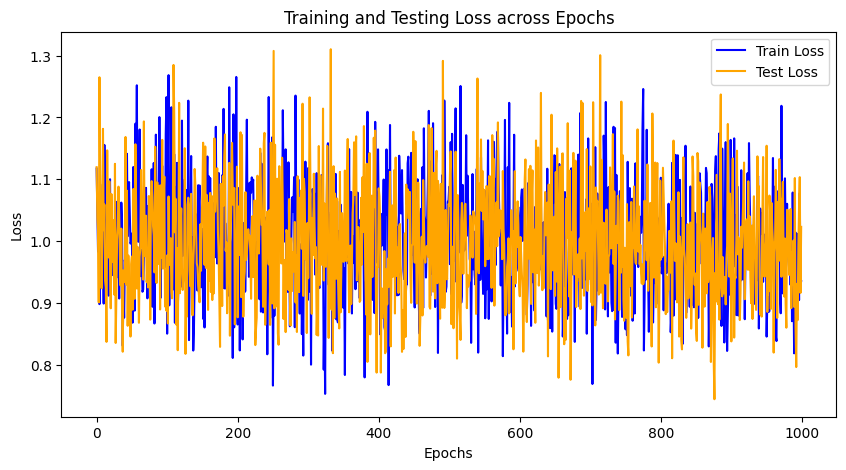

In [35]:
import matplotlib.pyplot as plt

# Assuming you have already stored all_train_losses and all_test_losses

epochs = range(len(all_train_losses))

plt.figure(figsize=(10, 5))
plt.plot(epochs, all_train_losses, label='Train Loss', color='blue')
plt.plot(epochs, all_test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss across Epochs')
plt.legend()
plt.show()


In [1]:
import torch
import torchvision
import numpy as np
import random
from torch.utils.data import Subset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision.transforms import Compose, ToTensor, Normalize, Grayscale

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
task_1_indices = range(100)
task_1_dataset = Subset(train_dataset, task_1_indices)
task_1_dataset_test = Subset(test_dataset, task_1_indices)

# Task 2: Create a subset with the next 10 samples (samples 1000 to 1009)
task_2_indices = range(100, 200)
task_2_dataset = Subset(train_dataset, task_2_indices)
task_2_dataset_test = Subset(test_dataset, task_2_indices)

task_3_indices = range(200, 300)
task_3_dataset = Subset(train_dataset, task_3_indices)
task_3_dataset_test = Subset(test_dataset, task_3_indices)

task_4_indices = range(300, 400)
task_4_dataset = Subset(train_dataset, task_4_indices)
task_4_dataset_test = Subset(test_dataset, task_4_indices)

task_5_indices = range(400, 500)
task_5_dataset = Subset(train_dataset, task_5_indices)
task_5_dataset_test = Subset(test_dataset, task_5_indices)

task_6_indices = range(500, 600)
task_6_dataset = Subset(train_dataset, task_6_indices)
task_6_dataset_test = Subset(test_dataset, task_6_indices)

task_7_indices = range(600, 700)
task_7_dataset = Subset(train_dataset, task_7_indices)
task_7_dataset_test = Subset(test_dataset, task_7_indices)

task_8_indices = range(700, 800)
task_8_dataset = Subset(train_dataset, task_8_indices)
task_8_dataset_test = Subset(test_dataset, task_8_indices)

task_9_indices = range(800, 900)
task_9_dataset = Subset(train_dataset, task_9_indices)
task_9_dataset_test = Subset(test_dataset, task_9_indices)

task_10_indices = range(900, 1000)
task_10_dataset = Subset(train_dataset, task_10_indices)
task_10_dataset_test = Subset(test_dataset, task_10_indices)
# Test dataset: Create a subset with the next 200 samples after the first 1010 samples
#test_indices = range(200)
#test_dataset = Subset(test_dataset, test_indices)

In [5]:
task_1_loader = torch.utils.data.DataLoader(task_1_dataset, batch_size=20, shuffle=True)
task_2_loader = torch.utils.data.DataLoader(task_2_dataset, batch_size=20, shuffle=True)
task_3_loader = torch.utils.data.DataLoader(task_3_dataset, batch_size=20, shuffle=True)
task_4_loader = torch.utils.data.DataLoader(task_4_dataset, batch_size=20, shuffle=True)
task_5_loader = torch.utils.data.DataLoader(task_5_dataset, batch_size=20, shuffle=True)
task_6_loader = torch.utils.data.DataLoader(task_6_dataset, batch_size=20, shuffle=True)
task_7_loader = torch.utils.data.DataLoader(task_7_dataset, batch_size=20, shuffle=True)
task_8_loader = torch.utils.data.DataLoader(task_8_dataset, batch_size=20, shuffle=True)
task_9_loader = torch.utils.data.DataLoader(task_9_dataset, batch_size=20, shuffle=True)
task_10_loader = torch.utils.data.DataLoader(task_10_dataset, batch_size=20, shuffle=True)

task_1_loader_test = torch.utils.data.DataLoader(task_1_dataset_test, batch_size=20, shuffle=True)
task_2_loader_test = torch.utils.data.DataLoader(task_2_dataset_test, batch_size=20, shuffle=True)
task_3_loader_test = torch.utils.data.DataLoader(task_3_dataset_test, batch_size=20, shuffle=True)
task_4_loader_test = torch.utils.data.DataLoader(task_4_dataset_test, batch_size=20, shuffle=True)
task_5_loader_test = torch.utils.data.DataLoader(task_5_dataset_test, batch_size=20, shuffle=True)
task_6_loader_test = torch.utils.data.DataLoader(task_6_dataset_test, batch_size=20, shuffle=True)
task_7_loader_test = torch.utils.data.DataLoader(task_7_dataset_test, batch_size=20, shuffle=True)
task_8_loader_test = torch.utils.data.DataLoader(task_8_dataset_test, batch_size=20, shuffle=True)
task_9_loader_test = torch.utils.data.DataLoader(task_9_dataset_test, batch_size=20, shuffle=True)
task_10_loader_test = torch.utils.data.DataLoader(task_10_dataset_test, batch_size=100, shuffle=True)
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=True)

In [18]:
len(task_9_dataset)

100

In [7]:
class BaseNet(nn.Module):
    def __init__(self):
        super(BaseNet, self).__init__()
        self.model = models.vgg16(pretrained=True)
        num_features = self.model.classifier[-1].in_features
        classifier = list(self.model.classifier.children())
        # Remove the last linear layer
        self.model.classifier = nn.Sequential(*classifier[:-1])
        # Add dropout after the last but one linear layer
        self.dropout = nn.Dropout(0.8)
        self.fc = nn.Linear(num_features, 10)
        #num_features = self.model.classifier[-1].in_features
        #self.model.classifier[-1] = nn.Linear(num_features, 10)
        #self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.model(x)
        x = self.dropout(x)
        x = self.fc(x)# Apply dropout after the linear layer
        return x

In [45]:
class BaseNet(nn.Module):
    def __init__(self):
        super(BaseNet, self).__init__()
        self.model = models.vgg16(pretrained=True)

        # Freeze all layers in the pretrained VGG16
        for param in self.model.parameters():
            param.requires_grad = False

        # Extract number of features for defining the new classifier
        num_features = self.model.classifier[-1].in_features

        # Define a new classifier with dropout after each fully connected layer
        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(),
            nn.Dropout(0.8),  # Apply dropout after the first fully connected layer
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.8),  # Apply dropout after the second fully connected layer
            nn.Linear(4096, 512),  # Adjust the output size to match the next layer
            nn.ReLU(),
            nn.Dropout(0.8),  # Apply dropout after the third fully connected layer
            nn.Linear(512, 10)  # Assuming 10 output classes
        )

    def forward(self, x):
        x = self.model.features(x)
        #print("Shape after convolutional layers:", x.shape)
        
        x = x.view(x.size(0), -1)  # Flatten the output of conv layers
        #print("Flattened shape:", x.shape)
        
        x = self.classifier(x)
        #print("Shape after classifier layers:", x.shape)
        
        return x


In [46]:
base_model = BaseNet()
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [39]:
sample_input = torch.randn(1, 3, 224, 224)  # 1 sample, 3 channels, 224x224 size
output = base_model(sample_input)

Shape after convolutional layers: torch.Size([1, 512, 7, 7])
Flattened shape: torch.Size([1, 25088])
Shape after classifier layers: torch.Size([1, 10])


In [8]:
num_tasks = 10
inner_lr = 0.01
meta_lr = 0.001

task_loaders = [
    task_1_loader,
    task_2_loader,
    task_3_loader,
    task_4_loader,
    task_5_loader,
    task_6_loader,
    task_7_loader,
    task_8_loader,
    task_9_loader,
    task_10_loader
]

test_loaders = [
    task_1_loader_test,
    task_2_loader_test,
    task_3_loader_test,
    task_4_loader_test,
    task_5_loader_test,
    task_6_loader_test,
    task_7_loader_test,
    task_8_loader_test,
    task_9_loader_test,
    task_10_loader_test
]
# Initialize meta_gradient before the outer loop
meta_gradient = [torch.zeros_like(param) for param in base_model.parameters()]
test_losses_epoch = []
train_losses_epoch = []

In [44]:
optimizer = optim.SGD(base_model.parameters(), lr=inner_lr, weight_decay=0.1)
num_inner_steps = 5
num_inner_batches = 5  # Define the number of batches per inner loop step

for e in range(15):
    epoch_train_losses = []
    
    for i in range(num_tasks):
        task_loader = task_loaders[i]
        task_train_losses = []

        # Initialize model parameters for the inner loop
        theta = [param.clone().detach().requires_grad_(True) for param in base_model.parameters()]

        # Set the model to training mode
        base_model.train()  # This activates layers like dropout

        # Multiple inner loop steps
        for inner_step in range(num_inner_steps):
            task_loader_iter = iter(task_loader)
            for batch_idx, (XTrain, YTrain) in enumerate(task_loader_iter):
                optimizer.zero_grad()
                outputs = base_model(XTrain)
                loss = nn.CrossEntropyLoss()(outputs, YTrain)
                loss.backward()
                optimizer.step()

                # Calculate task-specific loss after each inner loop update
                task_train_losses.append(loss.item())

                #if batch_idx == num_inner_batches - 1:  # Control inner loop steps
                   # break  # Exit inner loop after num_inner_batches

        # Compute the mean loss for this task after all inner loop updates
        epoch_train_losses.append(sum(task_train_losses) / len(task_train_losses))

    train_losses_epoch.append(sum(epoch_train_losses) / len(epoch_train_losses))
    meta_gradient = [torch.zeros_like(param) for param in base_model.parameters()]

    task_test_losses = []  # Accumulate test losses for all tasks

    # Set the model to evaluation mode
    base_model.eval()  # Disables dropout during testing

    for j in range(num_tasks):
        test_loader = test_loaders[j]
        single_task_test_losses = []  # Store test losses for a single task

        for batch_idx, (XTest, YTest) in enumerate(test_loader):
            outputs = base_model(XTest)
            meta_loss = nn.CrossEntropyLoss()(outputs, YTest)
            single_task_test_losses.append(meta_loss.item())

        # Calculate the average test loss for this task
        task_test_losses.append(sum(single_task_test_losses) / len(single_task_test_losses))

    test_losses_epoch.append(sum(task_test_losses) / len(task_test_losses))

    # Perform meta-update outside the task loop
    with torch.no_grad():
        for param, meta_grad in zip(base_model.parameters(), meta_gradient):
            param -= meta_lr * meta_grad / num_tasks

    print(f"Epoch {e + 1}: Train Loss - {train_losses_epoch[e]:.4f}, Test Loss - {test_losses_epoch[e]:.4f}")


Epoch 1: Train Loss - 2.2949, Test Loss - 2.2811
Epoch 2: Train Loss - 2.2554, Test Loss - 2.2140
Epoch 3: Train Loss - 2.0854, Test Loss - 1.9386
Epoch 4: Train Loss - 1.8213, Test Loss - 1.7639
Epoch 5: Train Loss - 1.7201, Test Loss - 1.7320
Epoch 6: Train Loss - 1.6786, Test Loss - 1.7171
Epoch 7: Train Loss - 1.6400, Test Loss - 1.7172
Epoch 8: Train Loss - 1.5953, Test Loss - 1.6639
Epoch 9: Train Loss - 1.5479, Test Loss - 1.6469
Epoch 10: Train Loss - 1.5239, Test Loss - 1.6252
Epoch 11: Train Loss - 1.4928, Test Loss - 1.6045
Epoch 12: Train Loss - 1.4732, Test Loss - 1.6169
Epoch 13: Train Loss - 1.4604, Test Loss - 1.6070
Epoch 14: Train Loss - 1.4454, Test Loss - 1.5971
Epoch 15: Train Loss - 1.4280, Test Loss - 1.5901


In [9]:
from sklearn.metrics import accuracy_score
initial_lr = 0.01
optimizer = optim.SGD(base_model.parameters(), lr=initial_lr, weight_decay=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Define a learning rate scheduler

num_inner_steps = 5
num_inner_batches = 5  # Define the number of batches per inner loop step
num_tasks = len(task_loaders)  # Assuming you have task_loaders for different tasks

train_losses_tasks = [[] for _ in range(num_tasks)]  # List to store train losses for each task
test_losses_tasks = [[] for _ in range(num_tasks)]
task_accuracies_epochs = [[] for _ in range(num_tasks)]  # List to store test losses for each task

train_losses_epoch = []  # List to store average train losses per epoch
test_losses_epoch = []
overall_accuracies = []
  # List to store average test losses per epoch

for e in range(15):
    epoch_train_losses = []
    epoch_test_losses = []
    epoch_task_accuracies = []

    for i, task_loader in enumerate(task_loaders):
        task_train_losses = []

        # Initialize model parameters for the inner loop
        theta = [param.clone().detach().requires_grad_(True) for param in base_model.parameters()]

        # Set the model to training mode
        base_model.train()  # This activates layers like dropout

        # Multiple inner loop steps
        for inner_step in range(num_inner_steps):
            task_loader_iter = iter(task_loader)
            for batch_idx, (XTrain, YTrain) in enumerate(task_loader_iter):
                optimizer.zero_grad()
                outputs = base_model(XTrain)
                loss = nn.CrossEntropyLoss()(outputs, YTrain)
                loss.backward()
                optimizer.step()

                # Calculate task-specific loss after each inner loop update
                task_train_losses.append(loss.item())

                # Exit inner loop after num_inner_batches
                if batch_idx == num_inner_batches - 1:
                    break

        # Compute the mean loss for this task after all inner loop updates
        epoch_train_losses.append(sum(task_train_losses) / len(task_train_losses))
        train_losses_tasks[i].append(sum(task_train_losses) / len(task_train_losses))

        # Testing for this task
        base_model.eval()  # Set the model to evaluation mode
        task_test_losses = []  # Store test losses for this task
        task_predictions = []
        task_targets = []

        for batch_idx, (XTest, YTest) in enumerate(test_loaders[i]):
            outputs = base_model(XTest)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and targets for accuracy calculation
            task_predictions.extend(predicted.tolist())
            task_targets.extend(YTest.tolist())
            meta_loss = nn.CrossEntropyLoss()(outputs, YTest)
            task_test_losses.append(meta_loss.item())

        test_loss = sum(task_test_losses) / len(task_test_losses)
        task_accuracy = accuracy_score(task_targets, task_predictions)
        epoch_task_accuracies.append(task_accuracy)
        test_losses_tasks[i].append(test_loss)
        epoch_test_losses.append(test_loss)

    train_losses_epoch.append(sum(epoch_train_losses) / len(epoch_train_losses))
    test_losses_epoch.append(sum(epoch_test_losses) / len(epoch_test_losses))
    for i, acc in enumerate(epoch_task_accuracies):
        task_accuracies_epochs[i].append(acc)

    # Calculate overall accuracy for this epoch
    overall_accuracy = sum(epoch_task_accuracies) / num_tasks
    overall_accuracies.append(overall_accuracy)

    # Perform learning rate scheduling
    scheduler.step()

    print(f"Epoch {e + 1}: Train Loss - {train_losses_epoch[e]:.4f}, Test Loss - {test_losses_epoch[e]:.4f}")

# Print task accuracies over epochs and overall accuracy
for i, task_accs in enumerate(task_accuracies_epochs):
    print(f"Task {i + 1} Accuracies: {task_accs}")

print(f"Overall Accuracies: {overall_accuracies}")

Epoch 1: Train Loss - 2.2934, Test Loss - 2.2858
Epoch 2: Train Loss - 2.2250, Test Loss - 2.2138
Epoch 3: Train Loss - 1.9743, Test Loss - 1.9490
Epoch 4: Train Loss - 1.7579, Test Loss - 1.7777
Epoch 5: Train Loss - 1.6943, Test Loss - 1.7396
Epoch 6: Train Loss - 1.6576, Test Loss - 1.7128
Epoch 7: Train Loss - 1.6395, Test Loss - 1.7010
Epoch 8: Train Loss - 1.6049, Test Loss - 1.6845
Epoch 9: Train Loss - 1.5803, Test Loss - 1.6675
Epoch 10: Train Loss - 1.5473, Test Loss - 1.6544
Epoch 11: Train Loss - 1.5297, Test Loss - 1.6307
Epoch 12: Train Loss - 1.5113, Test Loss - 1.6217
Epoch 13: Train Loss - 1.4959, Test Loss - 1.6168
Epoch 14: Train Loss - 1.4879, Test Loss - 1.6108
Epoch 15: Train Loss - 1.4780, Test Loss - 1.6065
Task 1 Accuracies: [0.07, 0.1, 0.12, 0.17, 0.17, 0.18, 0.2, 0.19, 0.2, 0.18, 0.23, 0.26, 0.25, 0.25, 0.25]
Task 2 Accuracies: [0.08, 0.08, 0.14, 0.16, 0.19, 0.22, 0.22, 0.22, 0.26, 0.25, 0.22, 0.24, 0.24, 0.24, 0.24]
Task 3 Accuracies: [0.1, 0.1, 0.23, 0.19, 

In [73]:
Task1_Acc_adap =[0.07, 0.1, 0.12, 0.17, 0.17, 0.18, 0.2, 0.19, 0.2, 0.18, 0.23, 0.26, 0.25, 0.25, 0.25]

Task2_Acc_adap = [0.08, 0.08, 0.14, 0.16, 0.19, 0.22, 0.22, 0.22, 0.26, 0.25, 0.22, 0.24, 0.24, 0.24, 0.24]

Task3_Acc_adap= [0.1, 0.1, 0.23, 0.19, 0.2, 0.25, 0.25, 0.25, 0.27, 0.28, 0.31, 0.31, 0.33, 0.35, 0.34]

Task4_Acc_adap= [0.09, 0.09, 0.17, 0.18, 0.19, 0.2, 0.18, 0.19, 0.2, 0.2, 0.21, 0.2, 0.21, 0.22, 0.2]

Task5_Acc_adap= [0.26, 0.18, 0.25, 0.27, 0.27, 0.29, 0.29, 0.29, 0.28, 0.3, 0.27, 0.27, 0.29, 0.31, 0.28]

Task6_Acc_adap= [0.13, 0.1, 0.14, 0.18, 0.19, 0.2, 0.21, 0.21, 0.21, 0.21, 0.21, 0.22, 0.22, 0.22, 0.22]

Task7_Acc_adap=[0.16, 0.19, 0.2, 0.21, 0.21, 0.21, 0.21, 0.22, 0.24, 0.25, 0.24, 0.26, 0.26, 0.27, 0.25]

Task8_Acc_adap=[0.23, 0.2, 0.21, 0.26, 0.24, 0.22, 0.24, 0.24, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

Task9_Acc_adap=[0.38, 0.23, 0.27, 0.25, 0.26, 0.28, 0.32, 0.31, 0.3, 0.31, 0.37, 0.35, 0.39, 0.39, 0.4]


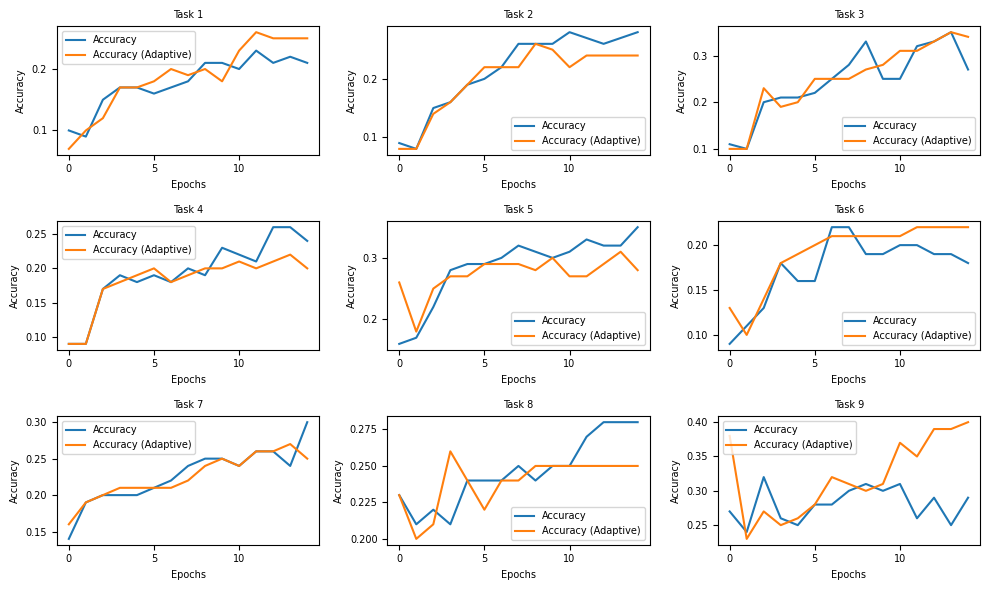

In [75]:
import matplotlib.pyplot as plt

# Your existing code for training and collecting losses...
task_acc_adap = [Task1_Acc_adap,
                Task2_Acc_adap,
                Task3_Acc_adap,
                Task4_Acc_adap,
                Task5_Acc_adap,
                Task6_Acc_adap,
                 Task7_Acc_adap,
                 Task8_Acc_adap,
                 Task9_Acc_adap
                ]
# Plotting all task train and test losses using subplots
num_tasks_to_plot = 9  # Number of tasks to plot (adjust as needed)
num_cols = 3  # Number of columns in the subplot grid

num_rows = (num_tasks_to_plot + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(num_tasks_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(task_accuracies_epochs[i], label= 'Accuracy')
    plt.plot(task_acc_adap[i], label= 'Accuracy (Adaptive)')
    #plt.plot(test_losses_tasks[i], label=f'Task {i + 1} Test Loss')
    plt.xlabel('Epochs', fontsize=7)
    plt.xticks(fontsize=7)
    plt.ylabel('Accuracy', fontsize=7)
    plt.yticks(fontsize=7)
    plt.title(f'Task {i + 1}', fontsize=7)
    plt.legend(fontsize=7)

plt.tight_layout()
plt.savefig('/home/.engr-ece/vfi245/Acc-MAML-combined.pdf')
plt.show()

In [65]:
adaptive_overall_acc

[0.172,
 0.147,
 0.198,
 0.213,
 0.215,
 0.22999999999999998,
 0.24000000000000005,
 0.242,
 0.25,
 0.252,
 0.26,
 0.265,
 0.273,
 0.279,
 0.272]

In [70]:
overall_accuracies

[0.158,
 0.15,
 0.2,
 0.21200000000000002,
 0.21799999999999997,
 0.22199999999999998,
 0.238,
 0.254,
 0.263,
 0.259,
 0.25999999999999995,
 0.26899999999999996,
 0.275,
 0.271,
 0.273]

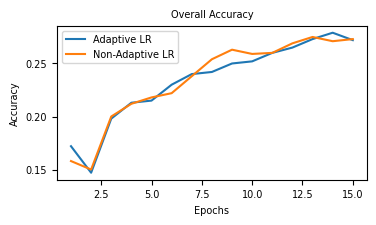

In [76]:
epochs = range(1, 16)  # Assuming you're running 15 epochs
plt.figure(figsize=(4, 2))
plt.plot(epochs, adaptive_overall_acc, label='Adaptive LR')
plt.plot(epochs, overall_accuracies, label='Non-Adaptive LR')
#plt.plot(epochs, test_losses_epoch, label='Test Loss')
plt.xlabel('Epochs', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.yticks(fontsize=7)
plt.title('Overall Accuracy', fontsize=7)
plt.legend(fontsize=7)
plt.savefig('/home/.engr-ece/vfi245/Acc-overall-MAML.pdf')
plt.show()

# Without Adaptive Learning

In [47]:
from sklearn.metrics import accuracy_score
initial_lr = 0.01
optimizer = optim.SGD(base_model.parameters(), lr=initial_lr, weight_decay=0.1)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Define a learning rate scheduler

num_inner_steps = 5
num_inner_batches = 5  # Define the number of batches per inner loop step
num_tasks = len(task_loaders)  # Assuming you have task_loaders for different tasks

train_losses_tasks = [[] for _ in range(num_tasks)]  # List to store train losses for each task
test_losses_tasks = [[] for _ in range(num_tasks)]
task_accuracies_epochs = [[] for _ in range(num_tasks)]  # List to store test losses for each task

train_losses_epoch = []  # List to store average train losses per epoch
test_losses_epoch = []
overall_accuracies = []
  # List to store average test losses per epoch

for e in range(15):
    epoch_train_losses = []
    epoch_test_losses = []
    epoch_task_accuracies = []

    for i, task_loader in enumerate(task_loaders):
        task_train_losses = []

        # Initialize model parameters for the inner loop
        theta = [param.clone().detach().requires_grad_(True) for param in base_model.parameters()]

        # Set the model to training mode
        base_model.train()  # This activates layers like dropout

        # Multiple inner loop steps
        for inner_step in range(num_inner_steps):
            task_loader_iter = iter(task_loader)
            for batch_idx, (XTrain, YTrain) in enumerate(task_loader_iter):
                optimizer.zero_grad()
                outputs = base_model(XTrain)
                loss = nn.CrossEntropyLoss()(outputs, YTrain)
                loss.backward()
                optimizer.step()

                # Calculate task-specific loss after each inner loop update
                task_train_losses.append(loss.item())

                # Exit inner loop after num_inner_batches
                if batch_idx == num_inner_batches - 1:
                    break

        # Compute the mean loss for this task after all inner loop updates
        epoch_train_losses.append(sum(task_train_losses) / len(task_train_losses))
        train_losses_tasks[i].append(sum(task_train_losses) / len(task_train_losses))

        # Testing for this task
        base_model.eval()  # Set the model to evaluation mode
        task_test_losses = []  # Store test losses for this task
        task_predictions = []
        task_targets = []

        for batch_idx, (XTest, YTest) in enumerate(test_loaders[i]):
            outputs = base_model(XTest)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and targets for accuracy calculation
            task_predictions.extend(predicted.tolist())
            task_targets.extend(YTest.tolist())
            meta_loss = nn.CrossEntropyLoss()(outputs, YTest)
            task_test_losses.append(meta_loss.item())

        test_loss = sum(task_test_losses) / len(task_test_losses)
        task_accuracy = accuracy_score(task_targets, task_predictions)
        epoch_task_accuracies.append(task_accuracy)
        test_losses_tasks[i].append(test_loss)
        epoch_test_losses.append(test_loss)

    train_losses_epoch.append(sum(epoch_train_losses) / len(epoch_train_losses))
    test_losses_epoch.append(sum(epoch_test_losses) / len(epoch_test_losses))
    for i, acc in enumerate(epoch_task_accuracies):
        task_accuracies_epochs[i].append(acc)

    # Calculate overall accuracy for this epoch
    overall_accuracy = sum(epoch_task_accuracies) / num_tasks
    overall_accuracies.append(overall_accuracy)

    # Perform learning rate scheduling
    #scheduler.step()

    print(f"Epoch {e + 1}: Train Loss - {train_losses_epoch[e]:.4f}, Test Loss - {test_losses_epoch[e]:.4f}")

# Print task accuracies over epochs and overall accuracy
for i, task_accs in enumerate(task_accuracies_epochs):
    print(f"Task {i + 1} Accuracies: {task_accs}")

print(f"Overall Accuracies: {overall_accuracies}")

Epoch 1: Train Loss - 2.2915, Test Loss - 2.2817
Epoch 2: Train Loss - 2.2131, Test Loss - 2.1918
Epoch 3: Train Loss - 1.9243, Test Loss - 1.9021
Epoch 4: Train Loss - 1.7400, Test Loss - 1.7644
Epoch 5: Train Loss - 1.6998, Test Loss - 1.7447
Epoch 6: Train Loss - 1.6691, Test Loss - 1.7350
Epoch 7: Train Loss - 1.6359, Test Loss - 1.7172
Epoch 8: Train Loss - 1.5952, Test Loss - 1.6915
Epoch 9: Train Loss - 1.5524, Test Loss - 1.6683
Epoch 10: Train Loss - 1.5211, Test Loss - 1.6526
Epoch 11: Train Loss - 1.4919, Test Loss - 1.6358
Epoch 12: Train Loss - 1.4675, Test Loss - 1.6313
Epoch 13: Train Loss - 1.4487, Test Loss - 1.6270
Epoch 14: Train Loss - 1.4422, Test Loss - 1.6159
Epoch 15: Train Loss - 1.4212, Test Loss - 1.6122
Task 1 Accuracies: [0.1, 0.09, 0.15, 0.17, 0.17, 0.16, 0.17, 0.18, 0.21, 0.21, 0.2, 0.23, 0.21, 0.22, 0.21]
Task 2 Accuracies: [0.09, 0.08, 0.15, 0.16, 0.19, 0.2, 0.22, 0.26, 0.26, 0.26, 0.28, 0.27, 0.26, 0.27, 0.28]
Task 3 Accuracies: [0.11, 0.1, 0.2, 0.21, 

In [ ]:
def compute_task_weights(task_losses):
    # Calculate average losses per task
    average_losses = [sum(losses) / len(losses) for losses in task_losses]

    # Normalize losses to range [0, 1]
    min_loss, max_loss = min(average_losses), max(average_losses)
    normalized_losses = [(loss - min_loss) / (max_loss - min_loss) for loss in average_losses]

    # Return normalized losses as weights
    return normalized_losses

In [46]:
from sklearn.metrics import accuracy_score
initial_lr = 0.01
optimizer = optim.SGD(base_model.parameters(), lr=initial_lr, weight_decay=0.1)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Define a learning rate scheduler

num_inner_steps = 5
num_inner_batches = 5  # Define the number of batches per inner loop step
num_tasks = len(task_loaders)  # Assuming you have task_loaders for different tasks

train_losses_tasks = [[] for _ in range(num_tasks)]  # List to store train losses for each task
test_losses_tasks = [[] for _ in range(num_tasks)]
task_accuracies_epochs = [[] for _ in range(num_tasks)]  # List to store test losses for each task

train_losses_epoch = []  # List to store average train losses per epoch
test_losses_epoch = []
overall_accuracies = []
  # List to store average test losses per epoch

for e in range(15):
    epoch_train_losses = []
    epoch_test_losses = []
    epoch_task_accuracies = []

    for i, task_loader in enumerate(task_loaders):
        task_train_losses = []

        # Initialize model parameters for the inner loop
        theta = [param.clone().detach().requires_grad_(True) for param in base_model.parameters()]

        # Set the model to training mode
        base_model.train()  # This activates layers like dropout

        # Multiple inner loop steps
        for inner_step in range(num_inner_steps):
            task_loader_iter = iter(task_loader)
            for batch_idx, (XTrain, YTrain) in enumerate(task_loader_iter):
                optimizer.zero_grad()
                outputs = base_model(XTrain)
                loss = nn.CrossEntropyLoss()(outputs, YTrain)
                loss.backward()
                optimizer.step()

                # Calculate task-specific loss after each inner loop update
                task_train_losses.append(loss.item())

                # Exit inner loop after num_inner_batches
                if batch_idx == num_inner_batches - 1:
                    break

        # Compute the mean loss for this task after all inner loop updates
        epoch_train_losses.append(sum(task_train_losses) / len(task_train_losses))
        train_losses_tasks[i].append(sum(task_train_losses) / len(task_train_losses))

        # Testing for this task
        base_model.eval()  # Set the model to evaluation mode
        task_test_losses = []  # Store test losses for this task
        task_predictions = []
        task_targets = []

        for batch_idx, (XTest, YTest) in enumerate(test_loaders[i]):
            outputs = base_model(XTest)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and targets for accuracy calculation
            task_predictions.extend(predicted.tolist())
            task_targets.extend(YTest.tolist())
            meta_loss = nn.CrossEntropyLoss()(outputs, YTest)
            task_test_losses.append(meta_loss.item())

        test_loss = sum(task_test_losses) / len(task_test_losses)
        task_accuracy = accuracy_score(task_targets, task_predictions)
        epoch_task_accuracies.append(task_accuracy)
        test_losses_tasks[i].append(test_loss)
        epoch_test_losses.append(test_loss)

    train_losses_epoch.append(sum(epoch_train_losses) / len(epoch_train_losses))
    test_losses_epoch.append(sum(epoch_test_losses) / len(epoch_test_losses))
    for i, acc in enumerate(epoch_task_accuracies):
        task_accuracies_epochs[i].append(acc)

    # Calculate overall accuracy for this epoch
    overall_accuracy = sum(epoch_task_accuracies) / num_tasks
    overall_accuracies.append(overall_accuracy)

    # Perform learning rate scheduling
    #scheduler.step()

    print(f"Epoch {e + 1}: Train Loss - {train_losses_epoch[e]:.4f}, Test Loss - {test_losses_epoch[e]:.4f}")

# Print task accuracies over epochs and overall accuracy
for i, task_accs in enumerate(task_accuracies_epochs):
    print(f"Task {i + 1} Accuracies: {task_accs}")

print(f"Overall Accuracies: {overall_accuracies}")

[2.2949054918289185,
 2.2554106426239016,
 2.0853979439735415,
 1.8212632761001586,
 1.720087287425995,
 1.6785569119453432,
 1.6399579887390137,
 1.5953314213752745,
 1.5478884382247924,
 1.5238838634490965,
 1.4928474063873292,
 1.4732478466033936,
 1.460398548603058,
 1.4454305930137634,
 1.4280117936134338]

In [47]:
test_losses_epoch

[2.2811134815216065,
 2.2140093946456907,
 1.9386046409606934,
 1.7639345002174376,
 1.7320041441917418,
 1.7171100735664369,
 1.7172306156158448,
 1.6639184832572937,
 1.6469085669517518,
 1.6252325344085694,
 1.6045046830177305,
 1.6169291138648987,
 1.6069930505752565,
 1.5971124744415284,
 1.5900690817832948]

In [66]:
for i in range(9):
    print(f" Task: {i}, Train loss: {train_losses_tasks[i]}, Test loss: {test_losses_tasks[i]}")

 Task: 0, Train loss: [2.3016170692443847, 2.2599939346313476, 2.0985055685043337, 1.7848932695388795, 1.6814545345306398, 1.6498986768722534, 1.6193872308731079, 1.569368977546692, 1.5473996019363403, 1.5176769876480103, 1.5173887586593628, 1.472996277809143, 1.4688017606735229, 1.4573892545700073, 1.4279906463623047], Test loss: [2.312029790878296, 2.2779656887054442, 2.1363399505615233, 1.8812043905258178, 1.8417563438415527, 1.8281023025512695, 1.827499270439148, 1.796774959564209, 1.7790525674819946, 1.7544658184051514, 1.7411724090576173, 1.6893490552902222, 1.718128228187561, 1.7060404539108276, 1.6839142799377442]
 Task: 1, Train loss: [2.310587558746338, 2.2548277091979982, 2.071703381538391, 1.753268265724182, 1.7304220914840698, 1.6869677591323853, 1.6516797924041748, 1.5966231107711792, 1.5762684965133666, 1.5476864719390868, 1.5114968347549438, 1.4731302452087403, 1.4694439697265624, 1.4492856931686402, 1.4192133140563965], Test loss: [2.299011468887329, 2.273150014877319,

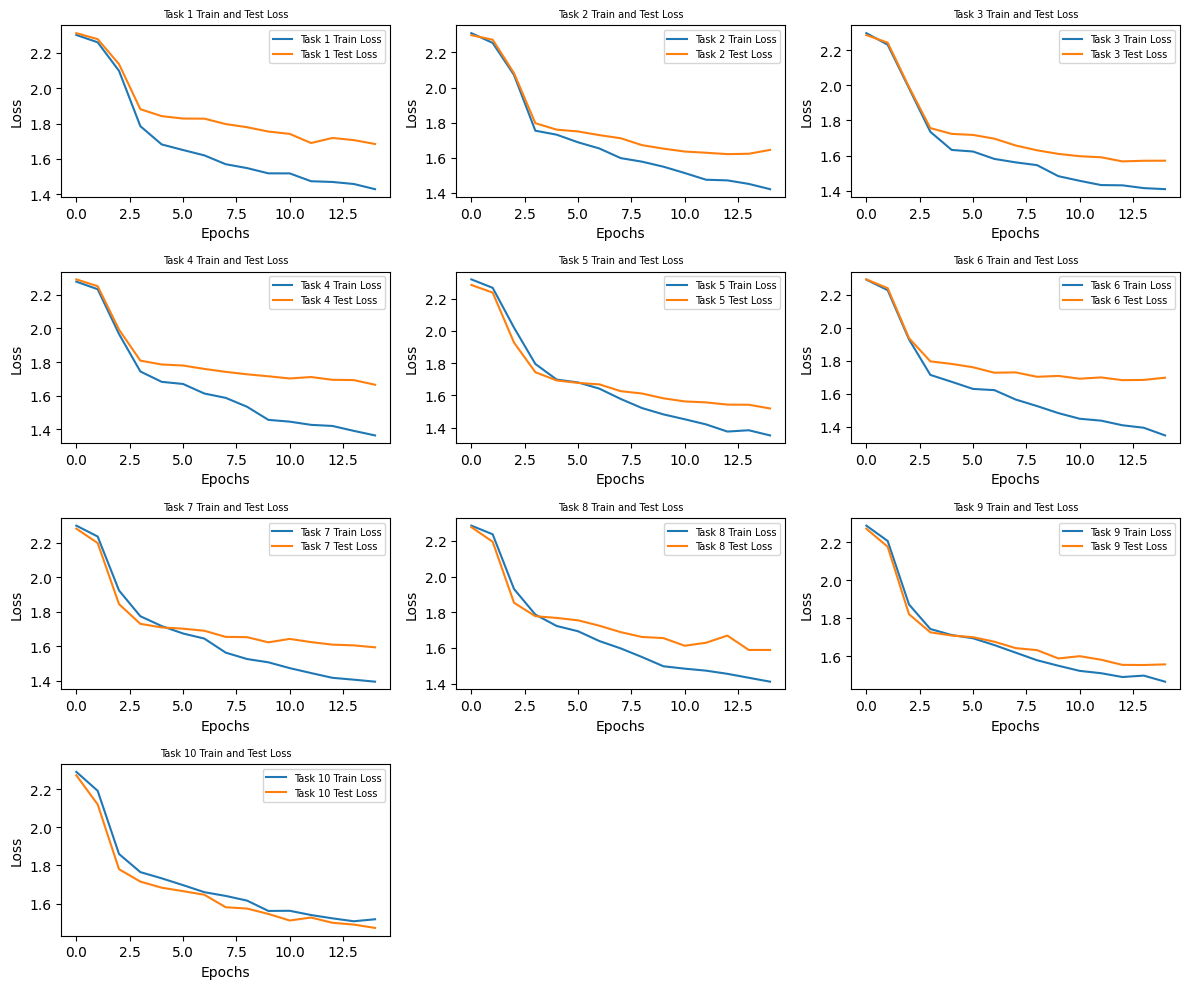

In [62]:
import matplotlib.pyplot as plt

# Your existing code for training and collecting losses...

# Plotting all task train and test losses using subplots
num_tasks_to_plot = 10  # Number of tasks to plot (adjust as needed)
num_cols = 3  # Number of columns in the subplot grid

num_rows = (num_tasks_to_plot + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(12, 10))  # Adjust figure size as needed

for i in range(num_tasks_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(train_losses_tasks[i], label=f'Task {i + 1} Train Loss')
    plt.plot(test_losses_tasks[i], label=f'Task {i + 1} Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Task {i + 1} Train and Test Loss', fontsize=7)
    plt.legend(fontsize=7)

plt.tight_layout()
plt.show()

In [70]:
initial_lr = 0.01
optimizer = optim.SGD(base_model.parameters(), lr=initial_lr, weight_decay=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Define a learning rate scheduler

num_inner_steps = 5
num_inner_batches = 5  # Define the number of batches per inner loop step
num_tasks = len(task_loaders)  # Assuming you have task_loaders for different tasks

train_losses_tasks = [[] for _ in range(num_tasks)]  # List to store train losses for each task
test_losses_tasks = [[] for _ in range(num_tasks)]   # List to store test losses for each task

train_losses_epoch = []  # List to store average train losses per epoch
test_losses_epoch = []   # List to store average test losses per epoch

for e in range(15):
    epoch_train_losses = []
    epoch_test_losses = []
    
    for i, task_loader in enumerate(task_loaders):
        task_train_losses = []

        # Initialize model parameters for the inner loop
        theta = [param.clone().detach().requires_grad_(True) for param in base_model.parameters()]

        # Set the model to training mode
        base_model.train()  # This activates layers like dropout

        # Multiple inner loop steps
        for inner_step in range(num_inner_steps):
            task_loader_iter = iter(task_loader)
            for batch_idx, (XTrain, YTrain) in enumerate(task_loader_iter):
                optimizer.zero_grad()
                outputs = base_model(XTrain)
                loss = nn.CrossEntropyLoss()(outputs, YTrain)
                loss.backward()
                optimizer.step()

                # Calculate task-specific loss after each inner loop update
                task_train_losses.append(loss.item())

                # Exit inner loop after num_inner_batches
                if batch_idx == num_inner_batches - 1:
                    break

        # Compute the mean loss for this task after all inner loop updates
        epoch_train_losses.append(sum(task_train_losses) / len(task_train_losses))
        train_losses_tasks[i].append(sum(task_train_losses) / len(task_train_losses))

        # Testing for this task
        base_model.eval()  # Set the model to evaluation mode
        task_test_losses = []  # Store test losses for this task

        for batch_idx, (XTest, YTest) in enumerate(test_loaders[i]):
            outputs = base_model(XTest)
            meta_loss = nn.CrossEntropyLoss()(outputs, YTest)
            task_test_losses.append(meta_loss.item())

        test_loss = sum(task_test_losses) / len(task_test_losses)
        test_losses_tasks[i].append(test_loss)
        epoch_test_losses.append(test_loss)
    
    train_losses_epoch.append(sum(epoch_train_losses) / len(epoch_train_losses))
    test_losses_epoch.append(sum(epoch_test_losses) / len(epoch_test_losses))

    # Perform learning rate scheduling
    scheduler.step()

    print(f"Epoch {e + 1}: Train Loss - {train_losses_epoch[e]:.4f}, Test Loss - {test_losses_epoch[e]:.4f}")


Epoch 1: Train Loss - 2.2986, Test Loss - 2.2880
Epoch 2: Train Loss - 2.2528, Test Loss - 2.2463
Epoch 3: Train Loss - 2.0592, Test Loss - 2.0385
Epoch 4: Train Loss - 1.8044, Test Loss - 1.8101
Epoch 5: Train Loss - 1.7062, Test Loss - 1.7484
Epoch 6: Train Loss - 1.6639, Test Loss - 1.7195
Epoch 7: Train Loss - 1.6422, Test Loss - 1.7058
Epoch 8: Train Loss - 1.6137, Test Loss - 1.6924
Epoch 9: Train Loss - 1.5844, Test Loss - 1.6776
Epoch 10: Train Loss - 1.5607, Test Loss - 1.6648
Epoch 11: Train Loss - 1.5423, Test Loss - 1.6424
Epoch 12: Train Loss - 1.5259, Test Loss - 1.6341
Epoch 13: Train Loss - 1.5132, Test Loss - 1.6288
Epoch 14: Train Loss - 1.5021, Test Loss - 1.6207
Epoch 15: Train Loss - 1.4895, Test Loss - 1.6153


# Adaptive-Learning

In [27]:
for i in range(9):
    print(f" Task: {i}, Train loss: {train_losses_tasks[i]}, Test loss: {test_losses_tasks[i]}")

 Task: 0, Train loss: [2.2860446834564208, 2.246123104095459, 2.09260283946991, 1.7674457025527954, 1.6820163869857787, 1.6499829912185668, 1.6185038805007934, 1.6033243560791015, 1.5882542181015014, 1.5440826320648193, 1.5493253135681153, 1.523157949447632, 1.5065520429611206, 1.5009300422668457, 1.489891104698181], Test loss: [2.308682107925415, 2.2774142742156984, 2.1265084743499756, 1.8858540058135986, 1.8303895235061645, 1.7992676734924316, 1.7983195781707764, 1.7821666717529296, 1.7691763639450073, 1.7521530628204345, 1.7101199865341186, 1.697324538230896, 1.6982948541641236, 1.6805447816848755, 1.6767828702926635]
 Task: 1, Train loss: [2.314730930328369, 2.2508515739440917, 2.0704857158660888, 1.7678596353530884, 1.6987887477874757, 1.6564229249954223, 1.628877305984497, 1.6321024370193482, 1.581372241973877, 1.5574425745010376, 1.5345747995376586, 1.5158806371688842, 1.4910204601287842, 1.4824891567230225, 1.4825430011749268], Test loss: [2.2975311279296875, 2.271636629104614,

In [71]:
non_adap_train_losses_epoch = [2.2915335779190062,
 2.2130545773506163,
 1.9243478417396545,
 1.7400071339607242,
 1.6997900376319883,
 1.6691342701911924,
 1.635902621746063,
 1.5952148084640503,
 1.5523908643722535,
 1.5210826892852787,
 1.4918729877471923,
 1.4675323367118833,
 1.4486875743865966,
 1.4421616206169128,
 1.4211934599876404]

In [72]:
non_adap_test_losses_epoch = [2.2816674757003783,
 2.191847677230835,
 1.9021417951583863,
 1.7644246554374696,
 1.7446519303321835,
 1.735031201839447,
 1.7172372174262995,
 1.6914943718910216,
 1.6683358907699586,
 1.6525545382499693,
 1.635759344100952,
 1.631338725090027,
 1.6270292711257937,
 1.6159267830848698,
 1.6121798563003538]

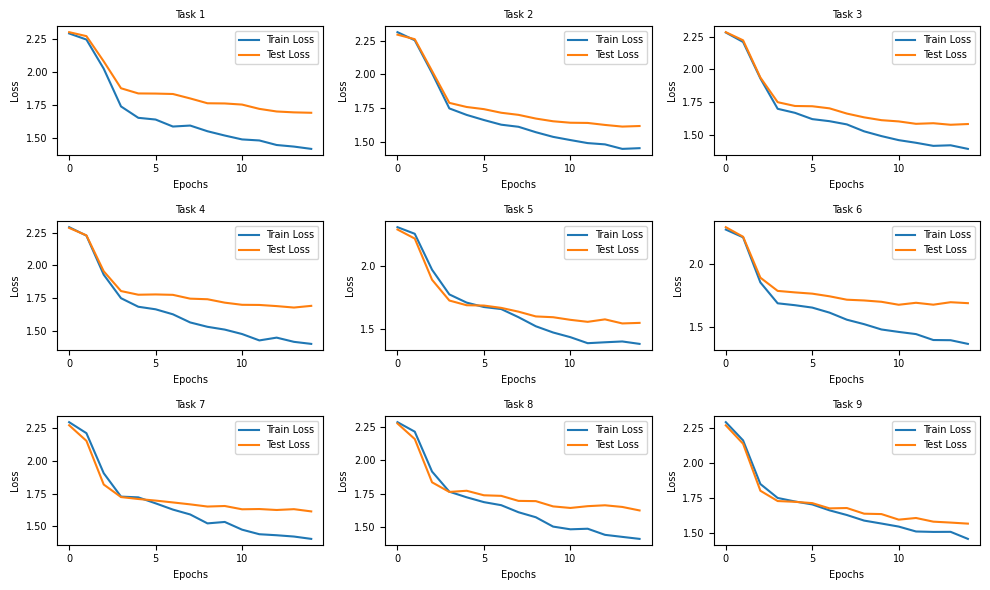

In [49]:
import matplotlib.pyplot as plt

# Your existing code for training and collecting losses...

# Plotting all task train and test losses using subplots
num_tasks_to_plot = 9  # Number of tasks to plot (adjust as needed)
num_cols = 3  # Number of columns in the subplot grid

num_rows = (num_tasks_to_plot + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i in range(num_tasks_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(train_losses_tasks[i], label= 'Train Loss')
    plt.plot(test_losses_tasks[i], label= 'Test Loss')
    plt.xlabel('Epochs', fontsize=7)
    plt.xticks(fontsize=7)
    plt.ylabel('Loss', fontsize=7)
    plt.yticks(fontsize=7)
    plt.title(f'Task {i + 1}', fontsize=7)
    plt.legend(fontsize=7)

plt.tight_layout()
plt.savefig('/home/.engr-ece/vfi245/Loss-MAML.pdf')
plt.show()

In [31]:
ls

anaconda3/                          Music/
Anaconda3-2021.05-Linux-x86_64.sh*  nohup.out
data/                               Pictures/
Desktop/                            Public/
Documents/                          Templates/
Downloads/                          tmux-3.2a/
HAM10k-VirtualMachine.ipynb         tmux-3.2a.tar.gz
MAML-adaptive.pdf                   Untitled.ipynb
MAML-project.ipynb                  Videos/


In [53]:
adaptive_train_loss = [2.293408760070801,
 2.224977005958557,
 1.974282591819763,
 1.7579343051910399,
 1.6942981600761413,
 1.6575793623924255,
 1.639506938457489,
 1.6048736000061035,
 1.5802617659568785,
 1.5472523846626283,
 1.5297208127975466,
 1.5113021149635315,
 1.4958695421218873,
 1.487895835876465,
 1.4780099177360533]

In [54]:
adaptive_test_loss = [2.2858138227462765,
 2.213807225227356,
 1.9489832639694213,
 1.777690920829773,
 1.7396307349205018,
 1.7128492069244388,
 1.7009773063659668,
 1.6845386838912966,
 1.6674589085578915,
 1.6543509721755982,
 1.6307391571998593,
 1.6216966319084165,
 1.6167565298080444,
 1.6108269190788271,
 1.6064747500419614]

In [78]:
ls

Acc-adaptive-MAML.pdf               Loss-MAML.pdf
Acc-MAML-adaptive.pdf               Loss-overall-MAML.pdf
Acc-MAML-combined.pdf               MAML-adaptive.pdf
Acc-MAML.pdf                        MAML-project.ipynb
Acc-overall-MAML.pdf                Music/
anaconda3/                          nohup.out
Anaconda3-2021.05-Linux-x86_64.sh*  Pictures/
data/                               Public/
Desktop/                            Templates/
Documents/                          tmux-3.2a/
Downloads/                          tmux-3.2a.tar.gz
HAM10k-VirtualMachine.ipynb         Untitled.ipynb
Loss-adaptive-MAML.pdf              Videos/


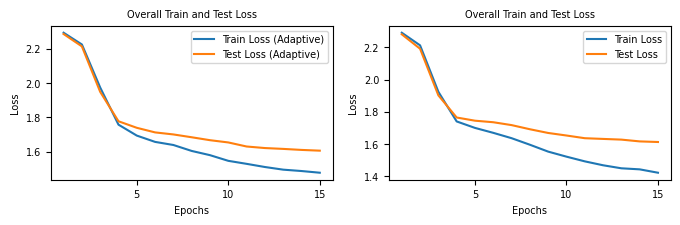

In [77]:
epochs = range(1, 16)  # Assuming you're running 15 epochs
plt.figure(figsize=(8, 2))
plt.subplot(1,2,1)
plt.plot(epochs, adaptive_train_loss, label='Train Loss (Adaptive)')
plt.plot(epochs, adaptive_test_loss, label='Test Loss (Adaptive)')
plt.xlabel('Epochs', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.title('Overall Train and Test Loss', fontsize=7)
plt.legend(fontsize=7)

plt.subplot(1,2,2)
plt.plot(epochs, train_losses_epoch, label='Train Loss')
plt.plot(epochs, test_losses_epoch, label='Test Loss')
plt.xlabel('Epochs', fontsize=7)
plt.xticks(fontsize=7)
plt.ylabel('Loss', fontsize=7)
plt.yticks(fontsize=7)
plt.title('Overall Train and Test Loss', fontsize=7)
plt.legend(fontsize=7)
plt.savefig('/home/.engr-ece/vfi245/Loss-overall-MAML.pdf')
plt.show()

# Without adaptive learning

In [ ]:
from sklearn.metrics import accuracy_score
initial_lr = 0.01
optimizer = optim.SGD(base_model.parameters(), lr=initial_lr, weight_decay=0.1)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Define a learning rate scheduler

num_inner_steps = 5
num_inner_batches = 5  # Define the number of batches per inner loop step
num_tasks = len(task_loaders)  # Assuming you have task_loaders for different tasks

train_losses_tasks = [[] for _ in range(num_tasks)]  # List to store train losses for each task
test_losses_tasks = [[] for _ in range(num_tasks)]
task_accuracies_epochs = [[] for _ in range(num_tasks)]  # List to store test losses for each task

train_losses_epoch = []  # List to store average train losses per epoch
test_losses_epoch = []
overall_accuracies = []
  # List to store average test losses per epoch

for e in range(15):
    epoch_train_losses = []
    epoch_test_losses = []
    epoch_task_accuracies = []

    for i, task_loader in enumerate(task_loaders):
        task_train_losses = []

        # Initialize model parameters for the inner loop
        theta = [param.clone().detach().requires_grad_(True) for param in base_model.parameters()]

        # Set the model to training mode
        base_model.train()  # This activates layers like dropout

        # Multiple inner loop steps
        for inner_step in range(num_inner_steps):
            task_loader_iter = iter(task_loader)
            for batch_idx, (XTrain, YTrain) in enumerate(task_loader_iter):
                optimizer.zero_grad()
                outputs = base_model(XTrain)
                loss = nn.CrossEntropyLoss()(outputs, YTrain)
                loss.backward()
                optimizer.step()

                # Calculate task-specific loss after each inner loop update
                task_train_losses.append(loss.item())

                # Exit inner loop after num_inner_batches
                if batch_idx == num_inner_batches - 1:
                    break

        # Compute the mean loss for this task after all inner loop updates
        epoch_train_losses.append(sum(task_train_losses) / len(task_train_losses))
        train_losses_tasks[i].append(sum(task_train_losses) / len(task_train_losses))

        # Testing for this task
        base_model.eval()  # Set the model to evaluation mode
        task_test_losses = []  # Store test losses for this task
        task_predictions = []
        task_targets = []

        for batch_idx, (XTest, YTest) in enumerate(test_loaders[i]):
            outputs = base_model(XTest)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and targets for accuracy calculation
            task_predictions.extend(predicted.tolist())
            task_targets.extend(YTest.tolist())
            meta_loss = nn.CrossEntropyLoss()(outputs, YTest)
            task_test_losses.append(meta_loss.item())

        test_loss = sum(task_test_losses) / len(task_test_losses)
        task_accuracy = accuracy_score(task_targets, task_predictions)
        epoch_task_accuracies.append(task_accuracy)
        test_losses_tasks[i].append(test_loss)
        epoch_test_losses.append(test_loss)

    train_losses_epoch.append(sum(epoch_train_losses) / len(epoch_train_losses))
    test_losses_epoch.append(sum(epoch_test_losses) / len(epoch_test_losses))
    for i, acc in enumerate(epoch_task_accuracies):
        task_accuracies_epochs[i].append(acc)

    # Calculate overall accuracy for this epoch
    overall_accuracy = sum(epoch_task_accuracies) / num_tasks
    overall_accuracies.append(overall_accuracy)

    # Perform learning rate scheduling
    #scheduler.step()

    print(f"Epoch {e + 1}: Train Loss - {train_losses_epoch[e]:.4f}, Test Loss - {test_losses_epoch[e]:.4f}")

# Print task accuracies over epochs and overall accuracy
for i, task_accs in enumerate(task_accuracies_epochs):
    print(f"Task {i + 1} Accuracies: {task_accs}")

print(f"Overall Accuracies: {overall_accuracies}")